In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## PCA 실습

- PCA: 고차원(많은 피처) 데이터를 저차원으로 변환하는 차원 축소 기법
    - 상관관계가 높은 여러 피처들을 묶어서 저차원으로 축소
    - 사용한 차원 축소는 상관관계가 높은 변수들(피처들)을 묶어서 새로운 축으로 변환하는 과정

### 예제2. 신용카드 고객 데이터(Credit Card Clients Data Set)

- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
- Data Folder
    - 'default of credit card clients.xls'를 'pca_credit_card.xls'로 변경

#### 데이터 확인 및 로드

In [2]:
card_df = pd.read_excel('data/pca_credit_card.xls', sheet_name='Data', header=1)
card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
card_df.set_index('ID', inplace=True)
card_df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### 데이터 크기 및 파악

In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [5]:
card_df.shape

(30000, 24)

#### Features

- LIMIT_BAL: Amount of the given credit (NT dollar)
    - it includes both the individual consumer credit and his/her family (supplementary) credit.

- SEX: 1 = male; 2 = female

- EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others

- MARRIAGE: 1 = married; 2 = single; 3 = others

- AGE: year

- PAY_0 ~ PAY_6: 과거 월별 상환 내역(2005년 4월(April)에서 9월(September))
    - 상환상태
        - -1 : pay duly, 1 : 1개월 연체, 2: 2개월 연체, 8: 8개월 연체, 9: 9개월 이상 연체
    - PAY_0 : 2005년 9월 상환 상태 
    - PAY_2 : 2005년 8월 상환 상태
    - PAY_3 : 2005년 7월 상환 상태
    - ...
    - PAY_6 : 2005년 4월 상환 상태

- BILL_AMT1 ~ BILL_AMT6: 청구 금액(NT dollar)
    - BILL_AMT1 : 2005년 9월(September) 청구 금액
    - BILL_AMT2 : 2005년 8월(August) 청구 금액
    - ... 
    - BILL_AMT6 : 2005년 4월(April) 청구 금액

- PAY_AMT1 ~ PAY_AMT6: 지불 금액(NT dollar)
    - PAY_AMT1 : 2005년 9월(September) 지불 금액
    - PAY_AMT2 : 2005년 8월(August) 청구 금액
    - ... 
    - PAY_AMT6 : 2005년 4월(April) 청구 금액

**Target**
- default payment next month : 다음달 연체 여부
    - 연체 : 1
    - 정상 납부 : 0

#### 컬럼명 변경

In [6]:
card_df.rename(columns={'PAY_0': 'PAY_1','default payment next month':'default'},
              inplace=True)
card_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

#### 데이터 조작
- default 컬럼을 y 변수로 별도 저장
- default 컬럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성

In [7]:
x = card_df.drop('default', axis=1)
y = card_df.default
x.shape, y.shape

((30000, 23), (30000,))

In [8]:
(y.value_counts()/ y.count()) * 100

default
0    77.88
1    22.12
Name: count, dtype: float64

#### 피처간 상관도 시각화

In [9]:
def correlation_heatmap(df):
    corr = df.corr()
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap,
                linewidths=.5, fmt='.2f', annot_kws={'size':8})
    plt.show()
    return corr

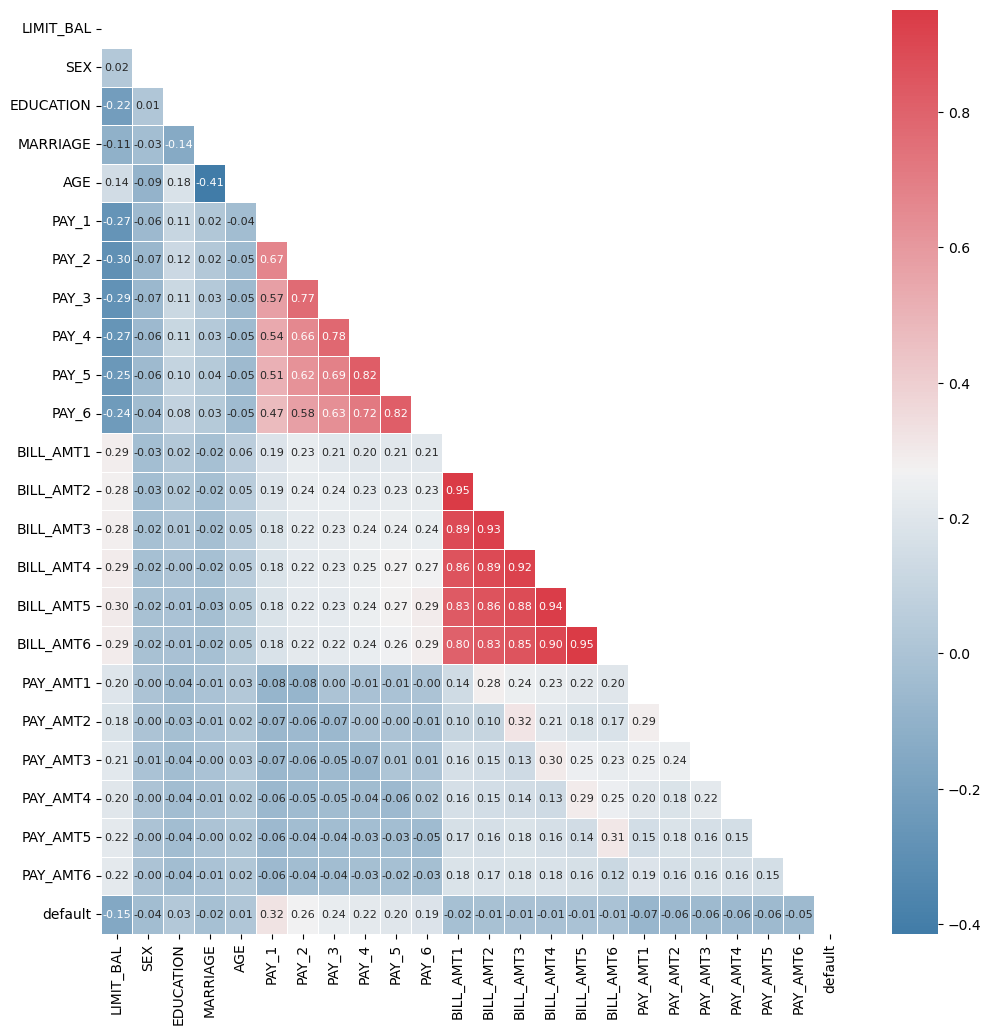

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [10]:
correlation_heatmap(card_df)

- BILL_AMT1 ~ 6: 상관계수 0.8 이상으로 매우 강한 상관관계가 있음
- PAY1 ~ 6: 상관계수가 0.5 ~ 0.6사이로 양의 상관관계가 있음

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
bill_colnames = ['BILL_AMT' + str(i) for i in range(1,7)]
bill_scaled = StandardScaler().fit_transform(x[bill_colnames])

# n_components = n / n개로 축소   -> 6개를 2개로 축소
pca = PCA(n_components=2)
bill_pca = pca.fit_transform(bill_scaled)
print(f'BILL_AMT 변환에 대한 변동성: {np.round(pca.explained_variance_ratio_,4)}')

BILL_AMT 변환에 대한 변동성: [0.9056 0.051 ]


#### 모든 피처에 대하여 주성분분석을 통해 변환

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
def RF_modeling(x,y, scaled= None, cv=5, scoring='accuracy'):
    model = RandomForestClassifier(random_state=156)
    if scaled is None:
        x_ = x
        txt = '원본'
    else:
        x_ = StandardScaler().fit_transform(x)
        txt = 'Standard Scaled'
    scores = cross_val_score(model, x_ ,y, scoring= scoring, cv= cv)
    print(f'{txt} 데이터에 대한 교차검증(cv= {cv}) 결과')
    print(f' - 개별 정확도: {np.round(scores,4)}')
    print(f' - 평균 정확도: {np.mean(scores):.4f}')

#### 분류 예측 성능 비교1 : 원본데이터 사용

- 원본 데이터 세트

In [ ]:
RF_modeling(x,y)

- PCA 변환한 데이터 세트

In [16]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
RF_modeling(x_pca, y)

KeyboardInterrupt: 

In [17]:
# 23개 -> 2개로 축소
x.shape, x_pca.shape

((30000, 23), (30000, 2))

In [18]:
# 축소 전 데이터를 2개로 축소했어도 총 약 91%를 설명할 수 있다.
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.61043701, 0.29535381]), 0.9057908258429447)

=> 단 2개의 PCA 컴포넌트만으로 23개의 피처들을 91% 설명할 수 있음 

In [20]:
for n in range(10,2,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    print(f'주성분 수: {n}인 경우')
    RF_modeling(x_pca, y)

주성분 수: 10인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.778  0.7835 0.7815 0.7902 0.7867]
 - 평균 정확도: 0.7840
주성분 수: 9인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7772 0.7785 0.7792 0.7888 0.7812]
 - 평균 정확도: 0.7810
주성분 수: 8인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7775 0.783  0.7842 0.7912 0.7853]
 - 평균 정확도: 0.7842
주성분 수: 7인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7728 0.7815 0.7837 0.7897 0.7848]
 - 평균 정확도: 0.7825
주성분 수: 6인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.769  0.7752 0.7803 0.7873 0.7808]
 - 평균 정확도: 0.7785
주성분 수: 5인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7668 0.7718 0.7795 0.7857 0.7802]
 - 평균 정확도: 0.7768
주성분 수: 4인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7558 0.762  0.7672 0.7758 0.7733]
 - 평균 정확도: 0.7668
주성분 수: 3인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.7493 0.7523 0.7535 0.7688 0.7673]
 - 평균 정확도: 0.7583


- 2개 주성분으로 압축한 신용카드 데이터 시각화

In [ ]:
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x)
pca_df = pd.DataFrame(x_pca, columns=['Comp1','Comp2'])
pca_df['target'] = y.values
pca_df.head(3)

In [ ]:
sns.scatterplot(data= pca_df, x='Comp1', y='Comp2', hue= 'target')
plt.legend(['due','overdue'])
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()

---

### 분류 예측 성능 비교2: 표준화된 데이터 사용

#### 문제. 

1. 신용카드 데이터를 표준화한 뒤 랜덤포레스트로 분류성능 예측하기

In [ ]:
x = card_df.drop('default', axis=1)
y = card_df.default
x_scaled = StandardScaler().fit_transform(x)

rf = RandomForestClassifier(random_state=156)

RF_modeling(x,y, scaled= 'Standard')

2. 신용카드 데이터를 표준화한 뒤 PCA 적용한 데이터로 분류 성능 예측하기
    - 99%정도 설명하는 성분들을 선택해서 적용

#### 주성분별 분산 반영비

In [70]:
x = card_df.drop('default', axis=1)
y = card_df.default
x_scaled = StandardScaler().fit_transform(x)

n_comp= []
n_comp_expl = []
for n in range(1, len(card_df.columns)):
    pca_scaled = PCA(n_components=n)
    x_pca_scaled = pca_scaled.fit_transform(x_scaled)
    var_ratio = np.round(np.sum(pca_scaled.explained_variance_ratio_), 2)
    if var_ratio >= 0.99:
        n_comp.append(n)
        print(f'99% 설명력을 갖는 주성분 수: {n}:\n{np.round(pca_scaled.explained_variance_ratio_,4), var_ratio}')
        n_comp_expl.append(np.round(pca_scaled.explained_variance_ratio_,4))
        print()
print(f'99% 설명력을 갖는 주성분 수: {n_comp}')

99% 설명력을 갖는 주성분 수: 18:
(array([0.2845, 0.1782, 0.0674, 0.064 , 0.0446, 0.0416, 0.0395, 0.0386,
       0.0379, 0.034 , 0.0319, 0.0297, 0.0248, 0.0228, 0.0175, 0.0113,
       0.0108, 0.0082]), 0.99)

99% 설명력을 갖는 주성분 수: 19:
(array([0.2845, 0.1782, 0.0674, 0.064 , 0.0446, 0.0416, 0.0395, 0.0386,
       0.0379, 0.034 , 0.0319, 0.0297, 0.0248, 0.0228, 0.0175, 0.0113,
       0.0108, 0.0082, 0.0057]), 0.99)

99% 설명력을 갖는 주성분 수: 20:
(array([0.2845, 0.1782, 0.0674, 0.064 , 0.0446, 0.0416, 0.0395, 0.0386,
       0.0379, 0.034 , 0.0319, 0.0297, 0.0248, 0.0228, 0.0175, 0.0113,
       0.0108, 0.0082, 0.0057, 0.0031]), 1.0)

99% 설명력을 갖는 주성분 수: 21:
(array([0.2845, 0.1782, 0.0674, 0.064 , 0.0446, 0.0416, 0.0395, 0.0386,
       0.0379, 0.034 , 0.0319, 0.0297, 0.0248, 0.0228, 0.0175, 0.0113,
       0.0108, 0.0082, 0.0057, 0.0031, 0.0018]), 1.0)

99% 설명력을 갖는 주성분 수: 22:
(array([0.2845, 0.1782, 0.0674, 0.064 , 0.0446, 0.0416, 0.0395, 0.0386,
       0.0379, 0.034 , 0.0319, 0.0297, 0.0248, 0.0228, 0.0175, 0.01

In [ ]:
for n in n_comp:
    pca_scaled_99 = PCA(n_components= n)
    x_pca_scaled_99 = pca_scaled_99.fit_transform(x_scaled)
    print(f'주성분 수: {n}인 경우')
    RF_modeling(x_pca_scaled_99, y)

주성분 수: 18인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.805  0.8038 0.8143 0.824  0.8132]
 - 평균 정확도: 0.8121
주성분 수: 19인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.8012 0.8037 0.8182 0.8205 0.8118]
 - 평균 정확도: 0.8111
주성분 수: 20인 경우
원본 데이터에 대한 교차검증(cv= 5) 결과
 - 개별 정확도: [0.8018 0.8022 0.8152 0.8193 0.814 ]
 - 평균 정확도: 0.8105
주성분 수: 21인 경우


In [ ]:
plt.plot(range(1,24), pca_scaled.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('variance_ratio')
plt.show()

----